# Classification on CIFAR 10 Dataset

Instructions - 
1. In order to kick start, code for setting up the dataframes has already been given (Step 1 to 5)
2. Go through the entire code written below and put the relavent comment for each line of code. Understanding below mentioned code is very important.
3. After commenting the code in step 1 to 5, complete step 6 and 7

### Step - 1 (Setup Code)

In [1]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload module is not an IPython extension.


UsageError: Line magic function `%autoreload` not found.


### Step - 2 (Download the dataset)

In [ ]:
# # Use this code to download the dataset for the first time
# # You will be required to install wget using pip
# # For Linux users checkout the alternative for 'del'

# !wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
# !tar -xzvf cifar-10-python.tar.gz
# !del cifar-10-python.tar.gz

import wget

url = 'http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
wget.download(url, r'C:\Users\HP\Desktop\Innomatics_Internship\day18_Task2')


!tar -xzvf cifar-10-python.tar.gz

!del cifar-10-python.tar.gz

### Step - 3 (Load the Dataset)

In [2]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))


def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y


def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


### Step - 4 (Visualization)

Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

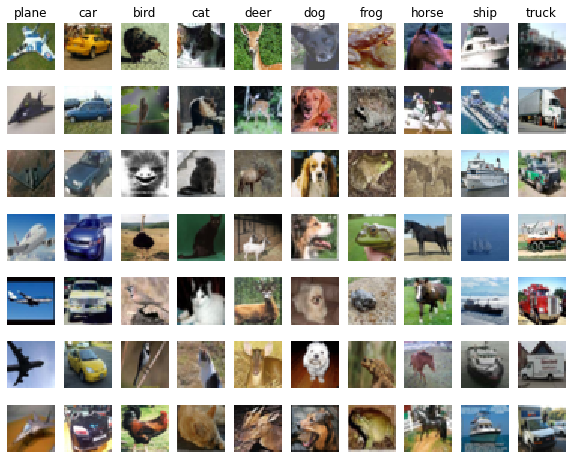

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

### Step - 5 (Flattening the images)

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [4]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


### Step - 6 (Apply all possible classification algorithms)

For each algo complete the following steps with appropriate plots, diagrams and code - 
1. Discuss the intuition behind each algorithm
2. Mention pros and cons
3. Discuss about Model parameters and Hyperparameters
4. Discuss about overfitting and underfitting with relavant plots and code (Hint: Use cross validation and plot hyperparameter vs accuracy score)
5. Discuss about train and test time/space complexities
 - https://www.hackerearth.com/practice/basic-programming/complexity-analysis/time-and-space-complexity/tutorial/#:~:text=Time%20complexity%20of%20an%20algorithm,the%20length%20of%20the%20input.&text=Let%20each%20operation%20takes%20time
6. Measure the performance of model using various metrics and write in detail about each metric

### 1. Logistic Regression 

It’s a classification algorithm, that is used where the response variable is categorical. The idea of Logistic Regression is to find a relationship between features and probability of particular outcome.

**Goal:**

Find a line that separates the positive and negative classes
    
    For example,
To predict whether an email is spam (1) or (0)
Whether the tumor is malignant (1) or not (0)

This type of a problem is referred to as Binomial Logistic Regression, where the response variable has two values 0 and 1 or pass and fail or true and false. Multinomial Logistic Regression deals with situations where the response variable can have three or more possible values.

**Assumption:**

Data is linearly separable.

> Why Logistic, not Linear?

With binary classification, let ‘x’ be some feature and ‘y’ be the output which can be either 0 or 1.
The probability that the output is 1 given its input can be represented as:

$$ P(y=1 \vert x)$$

- linear regression outputs values in the entire range of [-∞, ∞],whereas the actual values in this case are bound by 0 and 1.We therefore need a function that can output values between 0 and 1.


- Also, Linear regression has a considerable effect on outliers.
To avoid this problem, log-odds function or logit function is used.

Logistic regression can be expressed as:
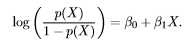

where, the left hand side is called the logit or log-odds function, and p(x)/(1-p(x)) is called odds.

The odds signifies the ratio of probability of success to probability of failure. Therefore, in Logistic Regression, linear combination of inputs are mapped to the log(odds) - the output being equal to 1.

If we take an inverse of the above function, we get:
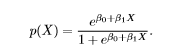


This is known as the Sigmoid function and it gives an S-shaped curve. It always gives a value of probability ranging from 0<p<1.

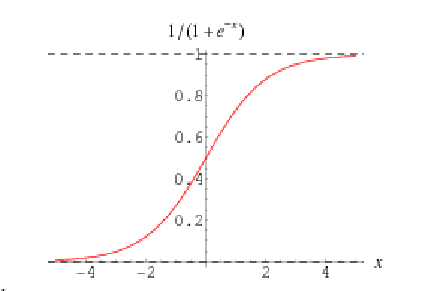


Estimation of Regression Coefficients
Unlike linear regression model, that uses Ordinary Least Square for parameter estimation, we use Maximum Likelihood Estimation.

There can be infinite sets of regression coefficients. The maximum likelihood estimate is that set of regression coefficients for which the probability of getting the data we have observed is maximum.

If we have binary data, the probability of each outcome is simply π if it was a success, and 1−π otherwise. Therefore we have the likelihood function:

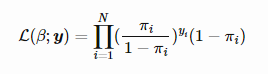

### Pros and Cons of Logistic Regression

> Pros
- Simple and efficient.
- Low variance.
- It provides probability score for observations.

> Cons
- Doesn’t handle large number of categorical features/variables well.
- It requires transformation of non-linear features.

### Model paramters and hyperparamaters of Logistic regression

- Logistic regression does not really have any critical hyperparameters to tune.

Sometimes, you can see useful differences in performance or convergence with different solvers (solver).

1. Solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]


2. Regularization (penalty) can sometimes be helpful.
Penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]

    Note: not all solvers support all regularization terms.

3. The C parameter controls the penality strength, which can also be effective.

    C in [100, 10, 1.0, 0.1, 0.01]

### Time and Space Complexity for logistic Regression

For query point (xq), Logistic Regression needs just a d-dimension weight vector(W).
yq = sigmoid(W.xq), which takes O(d) time and space required is O(d)

For the Training Logistic Regression, the optimization problem needs to be solved using Stochastic Gradient Descent that takes O(nd).
Logistic Regression is applicable for low latency applications and memory-efficient at run time.

>Train Time complexity = O(n*d)

 Run Time complexity =O(d)

 Space complexity = O(d)

### Model Evaluation Metrics


#### Confusion Matrix:

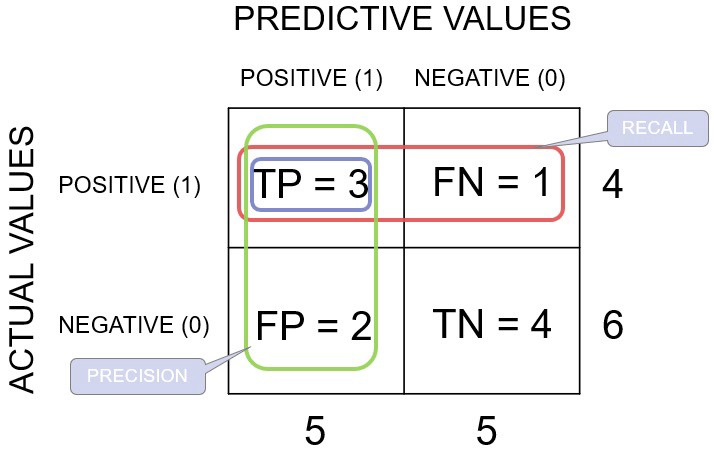
source:https://miro.medium.com/max/625/0*6xDHY76Pf-Fshlih.jpg

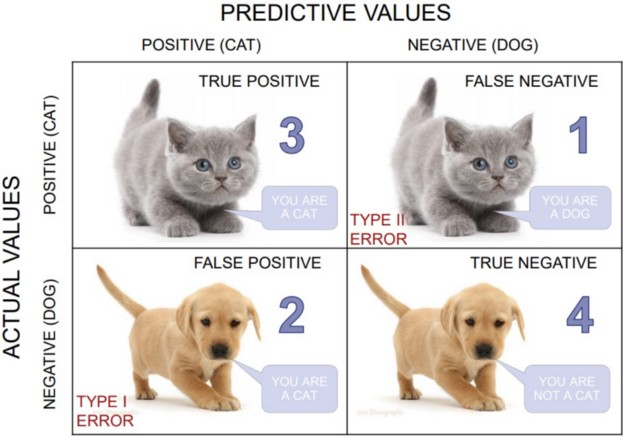
source:https://towardsdatascience.com/decoding-the-confusion-matrix-bb4801decbb


1. **Accuracy**

Classification accuracy is the number of correct predictions made as a ratio of all predictions made.
Overall, how often is the classifier correct?

$$ Accuracy = \frac {(TP+TN)}{total}$$

When our classes are roughly equal in size, we can use accuracy, which will give us correctly classified values.

2. **Misclassification Rate(Error Rate):**

- Overall, how often is it wrong.
- Since accuracy is the percent we correctly classified (success rate), it follows that our error rate (the percentage we got wrong) can be calculated as follows:

$$Error Rate = \frac {(FP+FN)} {total}$$

3. **Recall (aka Sensitivity):**
- Recall is defined as the ratio of the total number of correctly classified positive classes divide by the total number of positive classes.
- Or, out of all the positive classes, how much we have predicted correctly. 
- Recall should be high.
$$Recall = \frac{TP}{TP+FN}   or  \frac {True Positive}{Actual Positive Results}$$

4. **Precision:**
- Precision is defined as the ratio of the total number of correctly classified positive classes divided by the total number of predicted positive classes.
- Or, out of all the predictive positive classes, how much we predicted correctly.
- Precision should be high.

$$Precision = \frac{TP}{TP+FP} or \frac {True Positives}{Predicted Positive Results}$$

Trick to remember: Precision has Predictive Results in the denominator.

5. **F-score or F1-score:**
- It is difficult to compare two models with different Precision and Recall.
- So to make them comparable, we use F-Score.
- It is the Harmonic Mean of Precision and Recall.
- As compared to Arithmetic Mean, Harmonic Mean punishes the extreme values more.
- F-score should be high.

$$F_score =  \frac{2* precision * recall}{precision + recall}$$

6. **Specificity:**

Specificity determines the proportion of actual negatives that are correctly identified.
It is the true negative rate or the proportion of true negatives to everything that should have been classified as negative.

$$Specifity= \frac{TN}{FP+TN}  or \frac{True Negatives}{Actual Negatives}$$


Summary :
- Precision is how certain you are of your true positives.
- Recall is how certain you are that you are not missing any positives.
- Choose Recall if the occurrence of false negatives is unaccepted/intolerable. 
    - For example, in the case of diabetes that you would rather have some extra false positives (false alarms) over saving some false negatives.
    
- Choose Precision if you want to be more confident of your true positives. 
    - For example, in case of spam emails, you would rather have some spam emails in your inbox rather than some regular emails in your spam box. You would like to be extra sure that email X is spam before we put it in the spam box.
    
- Choose Specificity if you want to cover all true negatives, i.e. meaning we do not want any false alarms or false positives.
    - For example, in case of a drug test in which all people who test positive will immediately go to jail, you would not want anyone drug-free going to jail.
    
    
 #### Intrepretation:
- Accuracy value of 70% means that identification of 3 of every 10 cats is incorrect, and 7 is correct.
- Precision value of 60% means that label of 4 of every 10 cats is a not a cat (i.e. a dog), and 6 are cats.
- Recall value is 70% means that 3 of every 10 cats, in reality, are missed by our model and 7 are correctly identified as cats.
- Specificity value is 60% means that 4 of every 10 dogs (i.e. not cat) in reality are miss-labeled as cats and 6 are correctly labeled as dogs.

7. **Receiver Operating Characteristics (ROC) Curve**

By plotting the true positive rate (sensitivity) versus the false-positive rate (1 — specificity), we get the Receiver Operating Characteristic (ROC) curve. This curve allows us to visualize the trade-off between the true positive rate and the false positive rate.

- The following are examples of good ROC curves. The dashed line would be random guessing (no predictive value) and is used as a baseline; anything below that is considered worse than guessing. We want to be toward the top-left corner:

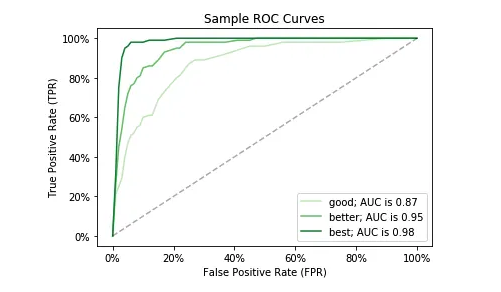

In the example above, the AUC is relatively close to 1 and greater than 0.5. A perfect classifier will have the ROC curve go along the Y-axis and then along the X-axis.
 

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [6]:
from sklearn.metrics import accuracy_score

### Logistic Model Fitting

In [17]:
mod1= LogisticRegression().fit(X_train,y_train)
y_pred1= mod1.predict(X_test)   
y_prob1=mod1.predict_proba(X_test)
acc1=accuracy_score(y_test,y_pred1)

In [9]:
import metricsmodule

0.324

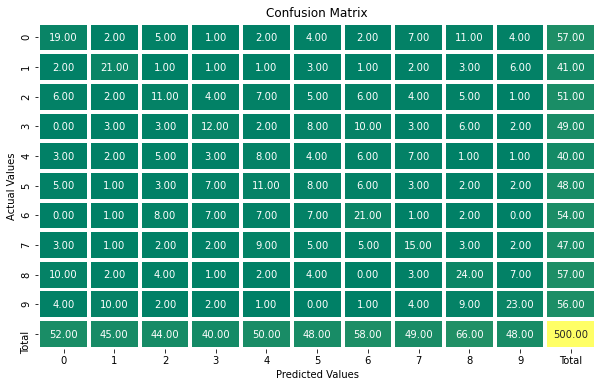

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.37      0.33      0.35        57
           1       0.47      0.51      0.49        41
           2       0.25      0.22      0.23        51
           3       0.30      0.24      0.27        49
           4       0.16      0.20      0.18        40
           5       0.17      0.17      0.17        48
           6       0.36      0.39      0.38        54
           7       0.31      0.32      0.31        47
           8       0.36      0.42      0.39        57
           9       0.48      0.41      0.44        56

    accuracy                           0.32       500
   macro avg       0.32      0.32      0.32       500
weighted avg       0.33      0.32      0.32       500


************************************Kappa Score************************************


Kappa Score = 0.24821395208142427


In [18]:
acc1
metricsmodule.classification_metric(y_test,y_pred1,y_prob1[:,1],label=[0,1,2,3,4,5,6,7,8,9],
                                 n=50,verbose=True)

### Cross validation and Hyperparamater Tuning for logistic Regression
https://www.geeksforgeeks.org/hyperparameter-tuning/

### GridSearch CV

In [11]:
import time

In [14]:
start= time.time()

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 

grid={"solver" :['newton-cg', 'lbfgs'],
       "penalty" :['l2','l1'],
       "C" : [1.0, 0.1, 0.01]}


cv_model=GridSearchCV(LogisticRegression(),param_grid=grid,cv=2,scoring='accuracy')
cv_model.fit(X_train,y_train)

end=time.time()

dur=end-start
dur

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.1, 0.01], 'penalty': ['l2', 'l1'],
                         'solver': ['newton-cg', 'lbfgs']},
             scoring='accuracy')

1331.4825885295868

11:6

In [15]:
cv_model.best_params_
log_mod_cv_acc=cv_model.best_score_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

0.322

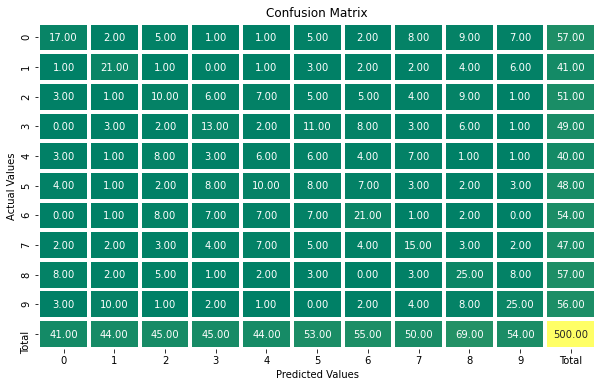

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.41      0.30      0.35        57
           1       0.48      0.51      0.49        41
           2       0.22      0.20      0.21        51
           3       0.29      0.27      0.28        49
           4       0.14      0.15      0.14        40
           5       0.15      0.17      0.16        48
           6       0.38      0.39      0.39        54
           7       0.30      0.32      0.31        47
           8       0.36      0.44      0.40        57
           9       0.46      0.45      0.45        56

    accuracy                           0.32       500
   macro avg       0.32      0.32      0.32       500
weighted avg       0.33      0.32      0.32       500


************************************Kappa Score************************************


Kappa Score = 0.24592264367509276


In [19]:
mod_cv1= LogisticRegression(C=0.1, penalty= 'l2', solver= 'lbfgs').fit(X_train,y_train)
y_pred_cv1= mod_cv1.predict(X_test)   
y_prob_cv1=mod_cv1.predict_proba(X_test)
acc_cv1=accuracy_score(y_test,y_pred_cv1)
acc_cv1

metricsmodule.classification_metric(y_test,y_pred_cv1,y_prob_cv1[:,1],label=[0,1,2,3,4,5,6,7,8,9],
                                 n=50,verbose=True)

The hyperparamters are same as the default parameters.

### RandomizedSearch CV

In [20]:
start= time.time()

grid={"solver" :['lbfgs'],
       "penalty" :['l2','l1'],
       "C" : [1.0, 0.1, 0.01,10]}


cv_model=RandomizedSearchCV(LogisticRegression(),grid,cv=2,scoring='accuracy')
cv_model.fit(X_train,y_train)

end=time.time()

dur=end-start
dur

RandomizedSearchCV(cv=2, estimator=LogisticRegression(),
                   param_distributions={'C': [1.0, 0.1, 0.01, 10],
                                        'penalty': ['l2', 'l1'],
                                        'solver': ['lbfgs']},
                   scoring='accuracy')

32.832656145095825

In [21]:
cv_model.best_params_
cv_model.best_score_


{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}

0.299

### ROC and AUC for Multiclass Logistic Regression 

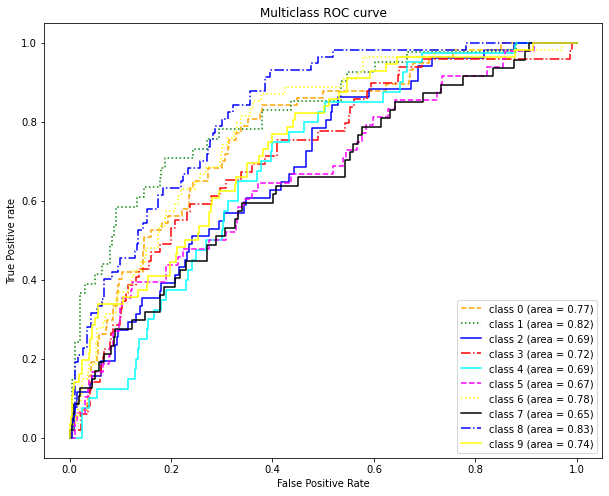

In [22]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve,auc


clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 10

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='class 0 (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle=':',color='green', label='class 1 (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='class 2 (area = %0.2f)' % roc_auc[2])
plt.plot(fpr[3], tpr[3], linestyle='-.',color='red', label='class 3 (area = %0.2f)' % roc_auc[3])
plt.plot(fpr[4], tpr[4], linestyle='-',color='cyan', label='class 4 (area = %0.2f)' % roc_auc[4])
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='class 5 (area = %0.2f)' % roc_auc[5])
plt.plot(fpr[6], tpr[6], linestyle=':',color='yellow', label='class 6 (area = %0.2f)' % roc_auc[6])
plt.plot(fpr[7], tpr[7], linestyle='-',color='black', label='class 7 (area = %0.2f)' % roc_auc[7])
plt.plot(fpr[8], tpr[8], linestyle='-.',color='blue', label='class 8 (area = %0.2f)' % roc_auc[8])
plt.plot(fpr[9], tpr[9], linestyle='-',color='yellow', label='class 9 (area = %0.2f)' % roc_auc[9])

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    


In [23]:
import warnings
warnings.filterwarnings('ignore')

### 2. Naive Bayes
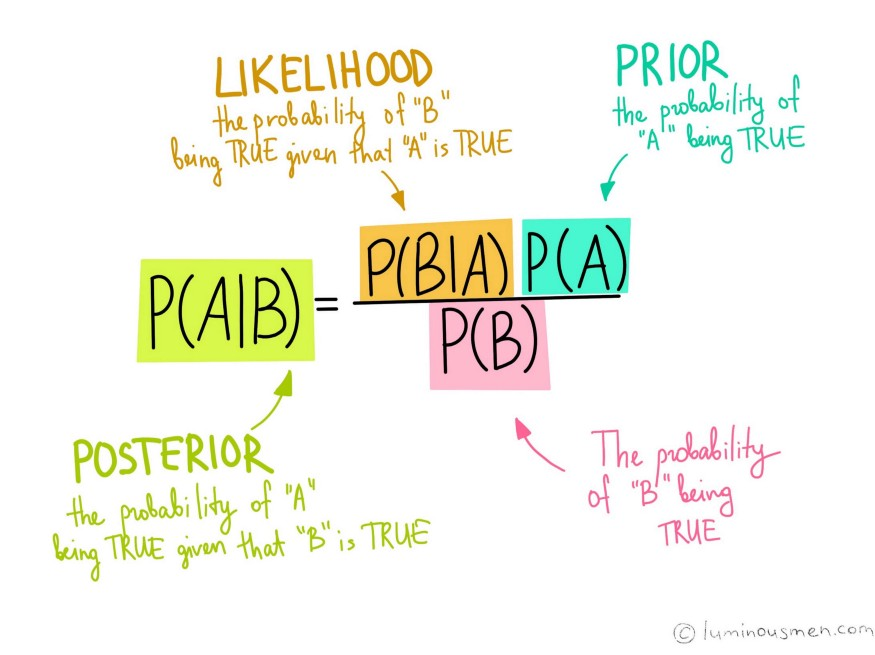 source:https://miro.medium.com/max/875/0*Q4WLX24axBZDQ_k2.jpeg


https://medium.com/analytics-vidhya/intuition-behind-naive-bayes-algorithm-laplace-additive-smoothing-e2cb43a82901


Naïve Bayes is a probabilistic machine learning algorithm based on the Bayes Theorem, used in a wide variety of classification tasks.

**Assumption**
- Assumption of independence among predictors. 
- In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

**Conditional probability** is a measure of the probability of an event occurring given that another event has (by assumption, presumption, assertion, or evidence) occurred.

$$P(A\vert B) = \frac {P(B\vert A) . P(A)}{P(B)}$$

- it tells us how often A happens given that B happens.

**Assumptions of Naive Bayes:**
The fundamental Naïve Bayes assumption is that each feature makes an:

- independent
- equal 

contribution to the outcome.


The assumptions made by Naïve Bayes are generally not correct in real-world situations. The independence assumption is never correct but often works well in practice. Hence the name ‘Naïve’.

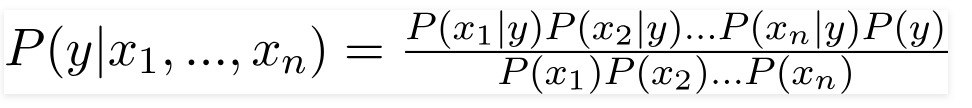

Here x1,x2….xn represent the features, i.e they can be mapped to Color, Type, and Origin. By substituting for X and expanding using the chain rule we get,

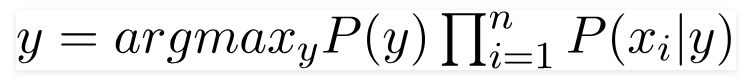

In our case, the class variable(y) has only two outcomes, yes or no. There could be cases where the classification could be multivariate. Therefore, we have to find the class variable(y) with maximum probability.

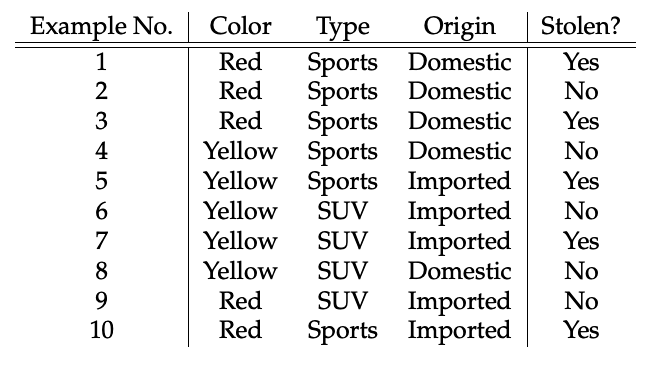
So in our example, we have 3 predictors X.

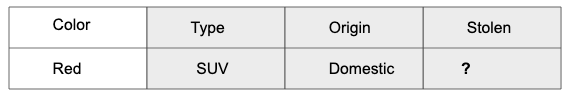

As per the equations discussed above, we can calculate the posterior probability P(Yes | X) as :

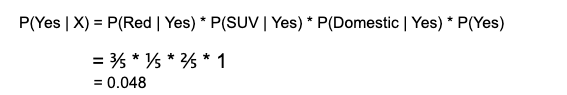

and, P(No | X):

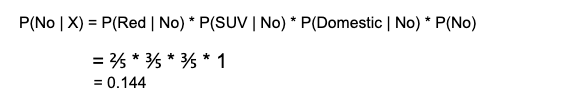

Since 0.144 > 0.048, Which means given the features RED SUV and Domestic, our example gets classified as ’NO’ the car is not stolen.

 🔥🎇 __There are three types of Naive Bayes model under the scikit-learn library:__

**Gaussian:** It is used in classification and it assumes that features follow a normal distribution.

**Multinomial:** It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider Bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

**Bernoulli:** The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.



**Pros:**

It is easy and fast to predict class of test data set. It also perform well in multi class prediction
When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.
It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).

**Cons:**

If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.
On the other side naive Bayes is also known as a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.
Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

### Time and Space Complexity for Naive Bayes

Given query point (xq), Naive Bayes need just prior and likelihood probabilities to predict output (yq), which permits the model to use at low latency applications.

So, during the training phase of Naive Bayes, it calculates all likelihood probabilities and prior probability, which takes Time complexity of O(ndc) where c= Number of classes and Space complexity= O(dc)
> Train Time complexity = O(n*d*c)

> Run Time complexity =O(d*c)

> Space complexity = O(d*c)

### 2. Gaussian Naive Bayes

In [24]:
start=time.time()
from sklearn.naive_bayes import GaussianNB
g_nb = GaussianNB().fit(X_train, y_train)
pred_gnb= g_nb.predict(X_test)
prob_gnb=g_nb.predict_proba(X_test)
gnb_acc=accuracy_score(y_test,pred_gnb) 

end=time.time()

dur=end-start
print("The GuassianNB model took {} time".format(dur))

The GuassianNB model took 0.9133932590484619 time


In [25]:
gnb_acc

0.29

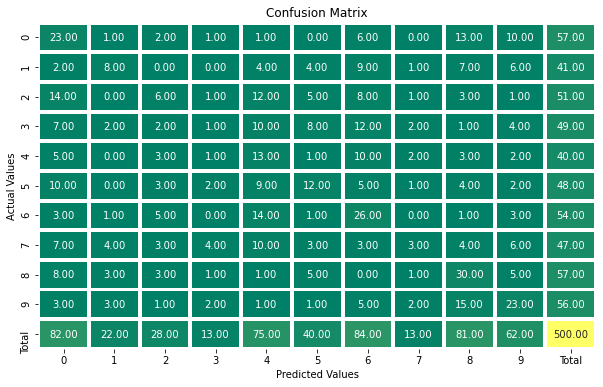

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.28      0.40      0.33        57
           1       0.36      0.20      0.25        41
           2       0.21      0.12      0.15        51
           3       0.08      0.02      0.03        49
           4       0.17      0.33      0.23        40
           5       0.30      0.25      0.27        48
           6       0.31      0.48      0.38        54
           7       0.23      0.06      0.10        47
           8       0.37      0.53      0.43        57
           9       0.37      0.41      0.39        56

    accuracy                           0.29       500
   macro avg       0.27      0.28      0.26       500
weighted avg       0.27      0.29      0.26       500


************************************Kappa Score************************************


Kappa Score = 0.20830675771510632


In [26]:
metricsmodule.classification_metric(y_test,pred_gnb,prob_gnb[:,1],label=[0,1,2,3,4,5,6,7,8,9],n=50,verbose=True)

### Hyperparameter Tuning for Gaussian Naive Bayes

- There are no parameters to tune in Gaussian Naive Bayes, It is a non_parametric model.

### - Hyperparamter tuning is not making any difference so let's try scaling

In [27]:
from sklearn.preprocessing import StandardScaler
X_trains = StandardScaler().fit_transform(X_train)
X_tests= StandardScaler().fit_transform(X_test)

start=time.time()
from sklearn.naive_bayes import GaussianNB
gnb_s = GaussianNB().fit(X_trains, y_train)
pred_gnb= gnb_s.predict(X_test)
prob_gnb=gnb_s.predict_proba(X_test)
gnbs_acc=accuracy_score(y_test,pred_gnb) 

end=time.time()

dur=end-start
print("The GuassianNB model took {} time".format(dur))

gnbs_acc

The GuassianNB model took 0.9455530643463135 time


0.082

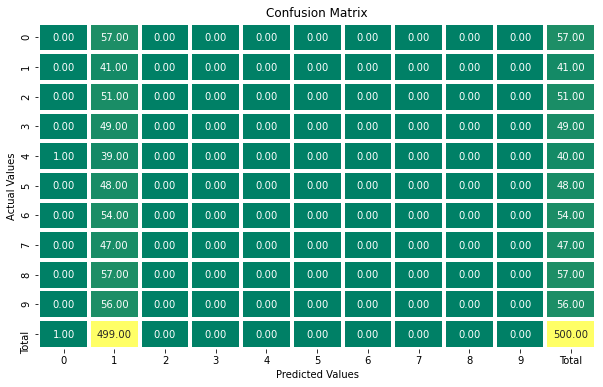

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.08      1.00      0.15        41
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        49
           4       0.00      0.00      0.00        40
           5       0.00      0.00      0.00        48
           6       0.00      0.00      0.00        54
           7       0.00      0.00      0.00        47
           8       0.00      0.00      0.00        57
           9       0.00      0.00      0.00        56

    accuracy                           0.08       500
   macro avg       0.01      0.10      0.02       500
weighted avg       0.01      0.08      0.01       500


************************************Kappa Score************************************


Kappa Score = -6.972163636675965e-05


In [28]:
metricsmodule.classification_metric(y_test,pred_gnb,prob_gnb[:,1],label=[0,1,2,3,4,5,6,7,8,9],n=50,verbose=True)

Kappa Score has improved slightly

### 2.1 Multinomial Naive Bayes

In [78]:
start=time.time()
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
mnb
pred_mnb= mnb.predict(X_test)
prob_mnb=mnb.predict_proba(X_test)
mnb_acc=accuracy_score(y_test,pred_mnb) 

end=time.time()

dur=end-start
print("The MultinomialNB model took {} time".format(dur))

MultinomialNB()

The MultinomialNB model took 0.10834240913391113 time


In [79]:
mnb_acc=accuracy_score(y_test,pred_mnb)

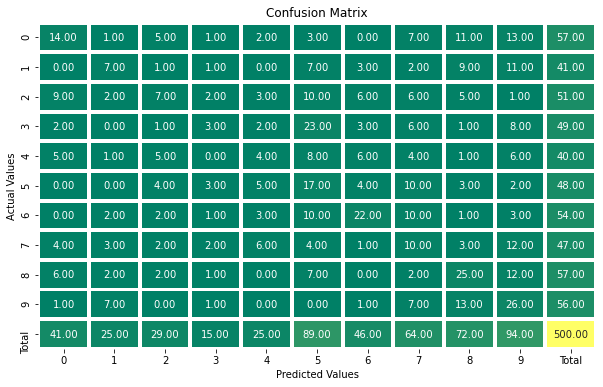

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.34      0.25      0.29        57
           1       0.28      0.17      0.21        41
           2       0.24      0.14      0.18        51
           3       0.20      0.06      0.09        49
           4       0.16      0.10      0.12        40
           5       0.19      0.35      0.25        48
           6       0.48      0.41      0.44        54
           7       0.16      0.21      0.18        47
           8       0.35      0.44      0.39        57
           9       0.28      0.46      0.35        56

    accuracy                           0.27       500
   macro avg       0.27      0.26      0.25       500
weighted avg       0.27      0.27      0.26       500


************************************Kappa Score************************************


Kappa Score = 0.18632853601555122


In [80]:
metricsmodule.classification_metric(y_test,pred_mnb,prob_mnb[:,1],label=[0,1,2,3,4,5,6,7,8,9],n=50,verbose=True)

### Hyperparamter Tuning for Multinomial Naive Bayes

In [31]:
start= time.time()

from sklearn.model_selection import GridSearchCV
 

grid={"alpha" :[1.0, 0.1, 0.01,10,100,0.0001],
       "fit_prior" :[True,False]}
       

cv_mnb = GridSearchCV(MultinomialNB(),param_grid=grid,cv=4,scoring='accuracy')
cv_mnb.fit(X_train,y_train)

end=time.time()

dur=end-start
dur

GridSearchCV(cv=4, estimator=MultinomialNB(),
             param_grid={'alpha': [1.0, 0.1, 0.01, 10, 100, 0.0001],
                         'fit_prior': [True, False]},
             scoring='accuracy')

7.02013897895813

In [32]:
cv_mnb.best_params_
cv_mnb.best_estimator_
cv_mnb.best_score_

{'alpha': 100, 'fit_prior': True}

MultinomialNB(alpha=100)

0.28800000000000003

### Fitting tuned model for Multinomial Naive Bayes

In [81]:
start=time.time()
from sklearn.naive_bayes import MultinomialNB
mod_cv2 = MultinomialNB(alpha=100).fit(X_train, y_train)

pred_cv2= mnb.predict(X_test)
prob_cv2=mnb.predict_proba(X_test)
acc_cv2=accuracy_score(y_test,pred_cv2) 

end=time.time()

dur=end-start
print("The MultinomialNB model took {} time".format(dur))

The MultinomialNB model took 0.06929612159729004 time


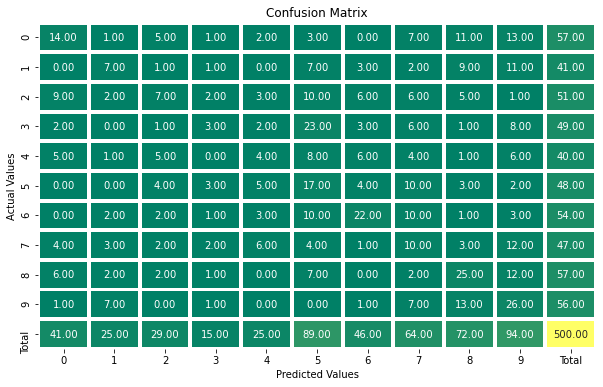

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.34      0.25      0.29        57
           1       0.28      0.17      0.21        41
           2       0.24      0.14      0.18        51
           3       0.20      0.06      0.09        49
           4       0.16      0.10      0.12        40
           5       0.19      0.35      0.25        48
           6       0.48      0.41      0.44        54
           7       0.16      0.21      0.18        47
           8       0.35      0.44      0.39        57
           9       0.28      0.46      0.35        56

    accuracy                           0.27       500
   macro avg       0.27      0.26      0.25       500
weighted avg       0.27      0.27      0.26       500


************************************Kappa Score************************************


Kappa Score = 0.18632853601555122


In [82]:
metricsmodule.classification_metric(y_test,pred_cv2,prob_cv2[:,1],label=[0,1,2,3,4,5,6,7,8,9],n=50,verbose=True)

### 3. Decision Tree
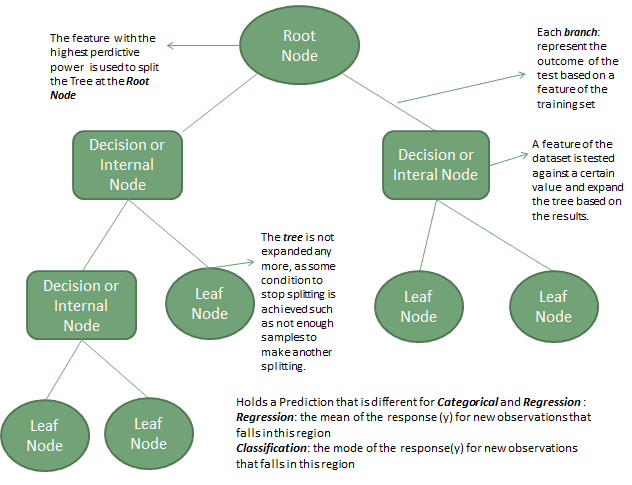 source:https://miro.medium.com/max/790/0*bGjNmf966J_PS9HB.png


There are algorithms for constructing decision trees. 
1. ID3 algorithm which is a basic one.
2. C4.5 algorithm, CART (Classification and Regression Tree)

In this Decision Tree diagram, we have:

**Root Node:** The first split which decides the entire population or sample data should further get divided into two or more homogeneous sets. In our case, the Outlook node.

**Splitting:** It is a process of dividing a node into two or more sub-nodes.

**Decision Node:** This node decides whether/when a sub-node splits into further sub-nodes or not. Here we have, Outlook node, Humidity node, and Windy node.

**Leaf:** Terminal Node that predicts the outcome (categorical or continuous value). The coloured nodes, i.e., Yes and No nodes, are the leaves.

**ID3 (Iterative Dichotomiser)**
ID3 decision tree algorithm uses Information Gain to decide the splitting points. In order to measure how much information we gain, we can use entropy to calculate the homogeneity of a sample

**What is “Entropy”?**
It is a measure of the amount of uncertainty in a data set. Entropy controls how a Decision Tree decides to split the data. It actually affects how a Decision Tree draws its boundaries.

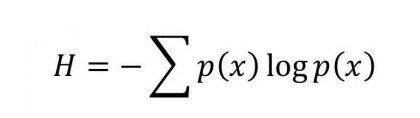

Information Gain is the decrease or increase in Entropy value when the node is split.

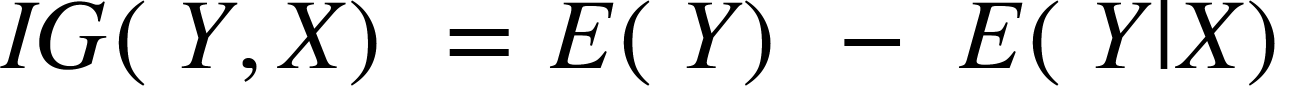

Choose attribute with the largest Information Gain as the Root Node


**CART (Classification and Regression Tree)**
Another decision tree algorithm CART uses the Gini method to create split points, including the Gini Index (Gini Impurity) and Gini Gain.

**Definition of Gini Index:** The probability of assigning a wrong label to a sample by picking the label randomly and is also used to measure feature importance in a tree.

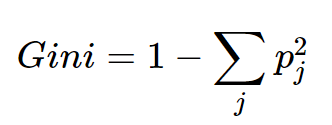


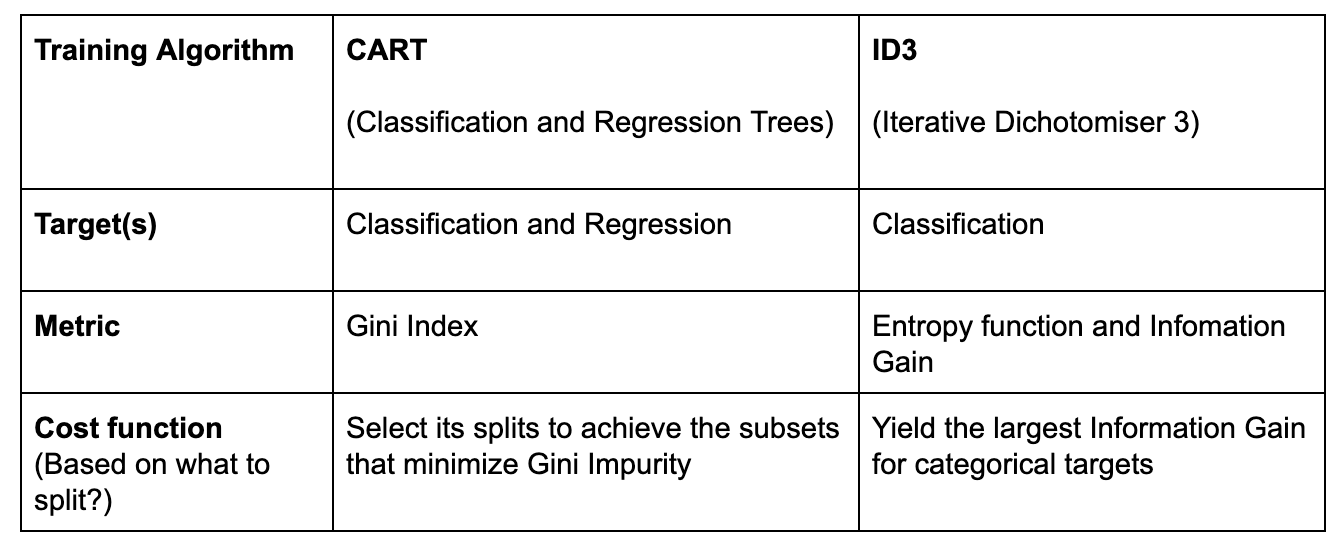






In [83]:
start=time.time()
from sklearn.tree import DecisionTreeClassifier
mod3 = DecisionTreeClassifier()
mod3.fit(X_train,y_train)
y_pred3 = mod3.predict(X_test)
y_prob3=mod3.predict_proba(X_test)
acc3=accuracy_score(y_test,y_pred3)
end=time.time()

dur=end-start
dur


DecisionTreeClassifier()

29.181117057800293

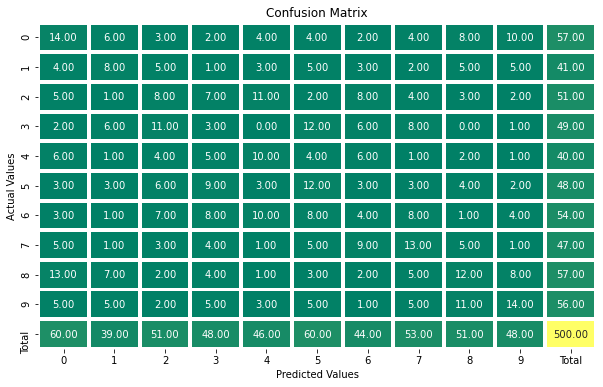

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.23      0.25      0.24        57
           1       0.21      0.20      0.20        41
           2       0.16      0.16      0.16        51
           3       0.06      0.06      0.06        49
           4       0.22      0.25      0.23        40
           5       0.20      0.25      0.22        48
           6       0.09      0.07      0.08        54
           7       0.25      0.28      0.26        47
           8       0.24      0.21      0.22        57
           9       0.29      0.25      0.27        56

    accuracy                           0.20       500
   macro avg       0.19      0.20      0.19       500
weighted avg       0.19      0.20      0.19       500


************************************Kappa Score************************************


Kappa Score = 0.10605481084831392


In [84]:
metricsmodule.classification_metric(y_test,y_pred3,y_prob3[:,1],label=[0,1,2,3,4,5,6,7,8,9],n=50,verbose=True)

### Hyperparamter Tuning for Decision Tree

In [37]:
start= time.time()
grid={"criterion" :["gini","entrophy"],
       "max_depth" :range(1,10),
       "min_samples_split":range(3,10),
       "min_samples_leaf":range(2,10),
       "max_features":range(4,7),
     }
       

cv3 = GridSearchCV(DecisionTreeClassifier(),param_grid=grid,cv=4,scoring='accuracy')
cv3.fit(X_train,y_train)

end=time.time()

dur=end-start
dur

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entrophy'],
                         'max_depth': range(1, 10), 'max_features': range(4, 7),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)},
             scoring='accuracy')

1874.702793121338

In [38]:
cv3.best_params_
cv3.best_score_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 6,
 'min_samples_leaf': 7,
 'min_samples_split': 9}

0.2484

### Tuned Model for Decision Trees

In [39]:
mod_cv3= DecisionTreeClassifier(criterion= 'gini',max_depth= 7,max_features= 6,min_samples_leaf= 9,min_samples_split= 4).fit(X_train,y_train)
y_pred_cv3 = mod_cv3.predict(X_test)
y_prob_cv3=mod_cv3.predict_proba(X_test)
acc_cv3=accuracy_score(y_test,y_pred_cv3)
end=time.time()

dur=end-start
dur


1874.918396949768

In [40]:
acc_cv3=accuracy_score(y_test,y_pred_cv3)

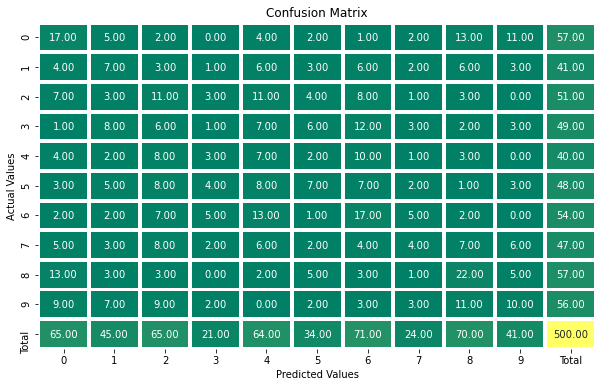

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.26      0.30      0.28        57
           1       0.16      0.17      0.16        41
           2       0.17      0.22      0.19        51
           3       0.05      0.02      0.03        49
           4       0.11      0.17      0.13        40
           5       0.21      0.15      0.17        48
           6       0.24      0.31      0.27        54
           7       0.17      0.09      0.11        47
           8       0.31      0.39      0.35        57
           9       0.24      0.18      0.21        56

    accuracy                           0.21       500
   macro avg       0.19      0.20      0.19       500
weighted avg       0.20      0.21      0.20       500


************************************Kappa Score************************************


Kappa Score = 0.11646622096801462


In [41]:
metricsmodule.classification_metric(y_test,y_pred_cv3,y_prob_cv3[:,1],label=[0,1,2,3,4,5,6,7,8,9],n=50,verbose=True)

### 4.Random Forest Classifier

- The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

- There are two keywords here - **random and forests.** Let us first understand what forest means. Random forest is a collection of many decision trees. Instead of relying on a single decision tree, you build many decision trees say 100 of them. And you know what a collection of trees is called - a forest. So you now understand why is it called a forest. 

**Why is it called random then?**

Say our dataset has 1,000 rows and 30 columns. There are two levels of randomness in this algorithm:

**At row level:** Each of these decision trees gets a random sample of the training data (say 10%) i.e. each of these trees will be trained independently on 100 randomly chosen rows out of 1,000 rows of data. Keep in mind that each of these decision trees is getting trained on 100 randomly chosen rows from the dataset i.e they are different from each other in terms of predictions.

**At column level:** The second level of randomness is introduced at the column level. Not all the columns are passed into training each of the decision trees. Say we want only 10% of columns to be sent to each tree. This means a randomly selected 3 column will be sent to each tree. So for the first decision tree, may be column C1, C2 and C4 were chosen. The next DT will have C4, C5, C10 as chosen columns and so on. 

**When is a random forest a poor choice relative to other algorithms?**

Random forests don't train well on smaller datasets as it fails to pick on the pattern.

- To simplify, say we know that 1 pen costs INR 1, 2 pens cost INR 2, 3 pens cost INR 6. In this case, linear regression will easily estimate the cost of 4 pens but random forests will fail to come up with a good estimate.

- There is a problem of interpretability with random forest. You can't see or understand the relationship between the response and the independent variables.
- Understand that random forest is a predictive tool and not a descriptive tool. You get variable importance but this may not suffice in many analysis of interests where the objective might be to see the relationship between response and the independent features.

- The time taken to train random forests may sometimes be too huge as you train multiple decision trees.

- Also, in the case of a categorical variable, the time complexity increases exponentially. 
- For a categorical column with n levels, RF tries split at 2^n -1 points to find the maximal splitting point. However, with the power of H2O we can now train random forests pretty fast. You may want to read about H2O at H2O in R explained.

In the case of a regression problem, the range of values response variable can take is determined by the values already available in the training dataset. Unlike linear regression, decision trees and hence random forest can't take values outside the training data.

**What are the advantages of using random forest?**

Since we are using multiple decision trees, the bias remains same as that of a single decision tree. However, the variance decreases and thus we decrease the chances of overfitting. 


When all you care about is the predictions and want a quick and dirty way out, random forest comes to the rescue. You don't have to worry much about the assumptions of the model or linearity in the dataset.

**Bagging:**

It is a way to decrease the variance in the prediction by generating additional data for training from dataset using combinations with repetitions to produce multi-sets of the original data.

**Model parameters and Hyperparameters**
- max_depth : The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node

-** min_sample_split:** a parameter that tells the decision tree in a random forest the minimum required number of observations in any given node in order to split it.
  - By increasing the value of the min_sample_split, we can reduce the number of splits that happen in the decision tree and therefore prevent the model from overfitting.

- **max_leaf_nodes:** his hyperparameter sets a condition on the splitting of the nodes in the tree and hence restricts the growth of the tree

- **min_samples_leaf:** This Random Forest hyperparameter specifies the minimum number of samples that should be present in the leaf node after splitting a node.

- **n_estimators:** no of decision trees.

- **max_sample (bootstrap sample):**The max_samples hyperparameter determines what fraction of the original dataset is given to any individual tree.

- **max_features:** max_features hyperparameter resembles the number of maximum features provided to each tree in a random forest.


**Time Space Complexity:**

As the random forest is formed from k base learners (Decision Trees) for query point xq to predict yq we get k outputs then by Aggregation (majority weight or mean/median) is applied on the outputs of the k base learners (DTs) to generate yq.


for the random forest with m decision trees

>Train Time complexity = O(n*log(n)*d*m)

>Space complexity=O(p*m)

>Run Time complexity= O(k*m)

During Training, Random Forest can be parallelized as each base learner can be trained on the different core of the computer.

 
 
 reference: https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/

### Model overfitting and Underfitting

- We might say that more trees should be able to produce a more generalized result, right? But by choosing more number of trees, the time complexity of the Random Forest model also increases.

- choosing a large number of estimators in a random forest model is not the best idea. Although it will not degrade the model, it can save you the computational complexity and prevent the use of a fire extinguisher on your CPU!

### Model fitting Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
mod4 = RandomForestClassifier(n_estimators = 100,max_features='auto',random_state=0)
mod4.fit(X_train,y_train)
y_pred4 = mod4.predict(X_test)
y_prob4 = mod4.predict_proba(X_test)
acc4=accuracy_score(y_test,y_pred4)

RandomForestClassifier(random_state=0)

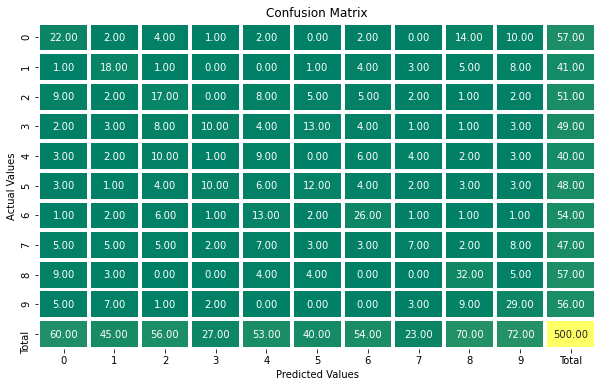

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.37      0.39      0.38        57
           1       0.40      0.44      0.42        41
           2       0.30      0.33      0.32        51
           3       0.37      0.20      0.26        49
           4       0.17      0.23      0.19        40
           5       0.30      0.25      0.27        48
           6       0.48      0.48      0.48        54
           7       0.30      0.15      0.20        47
           8       0.46      0.56      0.50        57
           9       0.40      0.52      0.45        56

    accuracy                           0.36       500
   macro avg       0.36      0.35      0.35       500
weighted avg       0.36      0.36      0.36       500


************************************Kappa Score************************************


Kappa Score = 0.2917500011136007


In [44]:
metricsmodule.classification_metric(y_test,y_pred4,y_prob4[:,1],label=[0,1,2,3,4,5,6,7,8,9],n=50,verbose=True)

### Hyperparamter tuning for Random Forest

In [45]:
from sklearn.pipeline import make_pipeline

In [46]:
start= time.time()
params={'n_estimators':[10,100,],
       'criterion':['gini', 'entropy'],
       'max_depth':[None,5,3],
       'max_features':['sqrt','log2']}
       

cv4 = GridSearchCV(RandomForestClassifier(),param_grid=params,cv=4)
cv4.fit(X_train,y_train)

end=time.time()

dur=end-start
dur

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 3],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100]})

820.1295983791351

In [47]:
cv4.best_params_
cv4.best_score_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 100}

0.39440000000000003

### Tuned Model for Random Forest

In [48]:
mod_cv4= RandomForestClassifier(criterion= 'gini',max_depth= None,max_features='sqrt',n_estimators=100).fit(X_train,y_train)
y_pred_cv4 = mod_cv4.predict(X_test)
y_prob_cv4=mod_cv4.predict_proba(X_test)
acc_cv4=accuracy_score(y_test,y_pred_cv4)
end=time.time()

dur=end-start
dur


1091.6245381832123

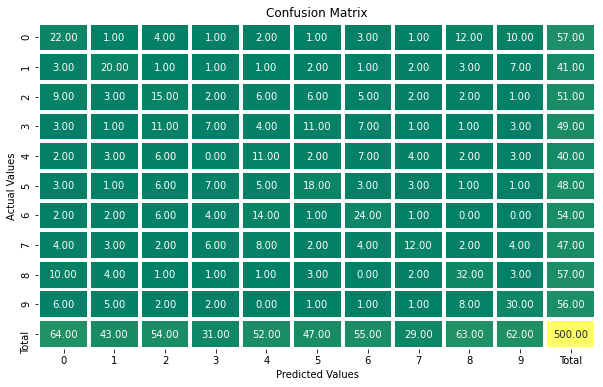

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.34      0.39      0.36        57
           1       0.47      0.49      0.48        41
           2       0.28      0.29      0.29        51
           3       0.23      0.14      0.18        49
           4       0.21      0.28      0.24        40
           5       0.38      0.38      0.38        48
           6       0.44      0.44      0.44        54
           7       0.41      0.26      0.32        47
           8       0.51      0.56      0.53        57
           9       0.48      0.54      0.51        56

    accuracy                           0.38       500
   macro avg       0.37      0.38      0.37       500
weighted avg       0.38      0.38      0.38       500


************************************Kappa Score************************************


Kappa Score = 0.3120614113204859


In [49]:
metricsmodule.classification_metric(y_test,y_pred_cv4,y_prob_cv4[:,1],label=[0,1,2,3,4,5,6,7,8,9],n=50,verbose=True)

### 5. K-NN Classifier

- KNN is a supervised machine learning algorithms.

**Goal:** our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

- The KNN classifier is also a non parametric and instance-based learning algorithm.

**Non-parametric** means it makes no explicit assumptions about the functional form of h, avoiding the dangers of mismodeling the underlying distribution of the data. For example, suppose our data is highly non-Gaussian but the learning model we choose assumes a Gaussian form. In that case, our algorithm would make extremely poor predictions.

**Instance-based learning** means that our algorithm doesn’t explicitly learn a model. Instead, it chooses to memorize the training instances which are subsequently used as “knowledge” for the prediction phase. 
So, only when we ask it to predict a label given an input the algorithm uses the training instances to predict the unknown labels.


### How does KNN work?

- Given a positive integer K, an unseen observation x and a similarity metric d(distance), KNN classifier performs the following two steps:

- It runs through the whole dataset computing d between x and each training observation.
- We’ll call the K points in the training data that are closest to x the set A. Note that K is usually odd to prevent tie situations.
- It then estimates the label of a new point in the dataset using distances, you do it by taking a vote of its k nearest neighbours. 

- The idea of similarity (sometimes called closeness, proximity, or distance).

Euclidean distance or straight-line distance is a popular and familiar choice of calculating distance. 
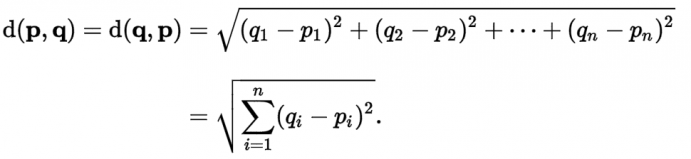

### How to Compute K-Nearest Neighbours: 

-  Choose the nearest data points (the value of K). K can be any integer. 
- Use Euclidean distance, Hamming, or Manhattan to calculate the distance between test data and each row of training. 
- Sort data set in ascending order based on the distance value. 
- From the sorted array, choose the top K rows.
- If it is a classification problem Based on the most appearing class of these rows, it will assign a class to the test point.
- If it is a regression it computes the average of corresponding n_nearest neighbours and assigns that value to the test observation.

### Pros and Cons of KNN

**Pros**

- Simple algorithm –easy to interpret.
- Versatile – useful for regression and classification
- High accuracy – you do not need to compare with better-supervised learning models
- No assumptions about data – no need to make additional assumptions, tune several parameters, or build a model. This makes it crucial in nonlinear data case. 

**Cons**

- Accuracy depends on the quality of the data
- With large data, the prediction stage might be slow
- Sensitive to the scale of the data and irrelevant features
- Requires high memory – need to store all of the training data
- Given that it stores all of the training, it can be computationally expensive.
- Imbalanced data causes problems
- Outlier sensitivity: very sensitive to outliers as it choses the neighbors based on distance.

### Parameters and Hyperparameters

- K- Nearest neighbours mainly has 3 hyperparameters i.e., n_neighbours, metric and p.
  - n_neighbours is the k in KNN
  - metric is the distance metric we want to use i.e., minkowski, euclidean, manhattan
  - p  is the power parameter for the Minkowski metric.
      - When p = 1, this is equivalent to using manhattan_distance, and euclidean_distance for p = 2.

KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')


**Time and space complexity**
Computing distance for one point takes o(d) time, as we are computing for each xi in training it takes o(nd)
- Run Time complexity = O(nd)
- Space complexity = O(nd)
- There is no train time complexity for KNN

The minimal training phase of KNN comes both at a memory cost, since we must store a potentially huge data set, as well as a computational cost during test time since classifying a given observation requires a run down of the whole data set.


In [50]:
from sklearn.neighbors import KNeighborsClassifier
mod_5=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
mod_5.fit(X_train,y_train)
y_pred5=mod_5.predict(X_test)
y_prob5=mod_5.predict_proba(X_test)
acc_5=accuracy_score(y_test,y_pred5)

KNeighborsClassifier()

0.278

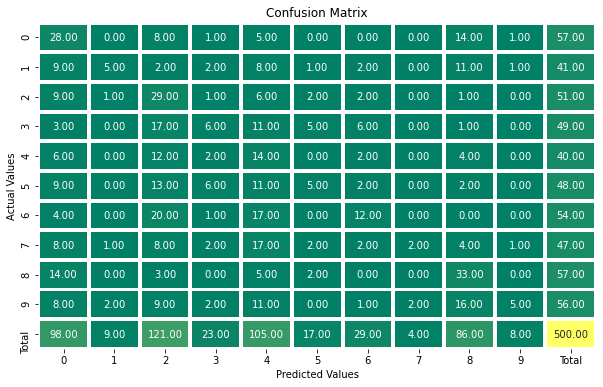

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.29      0.49      0.36        57
           1       0.56      0.12      0.20        41
           2       0.24      0.57      0.34        51
           3       0.26      0.12      0.17        49
           4       0.13      0.35      0.19        40
           5       0.29      0.10      0.15        48
           6       0.41      0.22      0.29        54
           7       0.50      0.04      0.08        47
           8       0.38      0.58      0.46        57
           9       0.62      0.09      0.16        56

    accuracy                           0.28       500
   macro avg       0.37      0.27      0.24       500
weighted avg       0.37      0.28      0.25       500


************************************Kappa Score************************************


Kappa Score = 0.19644566325508506


In [52]:
acc_5
metricsmodule.classification_metric(y_test,y_pred5,y_prob5[:,1],label=[0,1,2,3,4,5,6,7,8,9],n=50,verbose=True)

### Hyperparameter Tuning for K_NN


In [56]:
start= time.time()
params={'n_neighbors':[5,10,50,100],'p':[1,2]}
       
cv5 = GridSearchCV(KNeighborsClassifier(),param_grid=params,cv=5)
cv5.fit(X_train,y_train)

end=time.time()

dur=end-start
dur

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 50, 100], 'p': [1, 2]})

2094.969012737274

In [57]:
cv5.best_params_

{'n_neighbors': 10, 'p': 1}

### Tuned Model for K_NN

In [58]:
mod_cv5=KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=1).fit(X_train,y_train)
y_pred_cv5=mod_cv5.predict(X_test)
y_prob_cv5=mod_cv5.predict_proba(X_test)
acc_cv5=accuracy_score(y_test,y_pred_cv5)

0.278

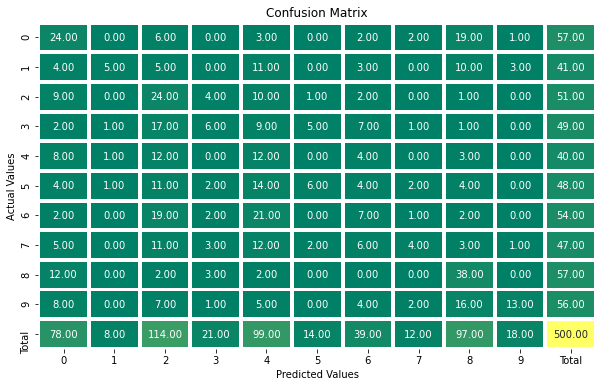

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.31      0.42      0.36        57
           1       0.62      0.12      0.20        41
           2       0.21      0.47      0.29        51
           3       0.29      0.12      0.17        49
           4       0.12      0.30      0.17        40
           5       0.43      0.12      0.19        48
           6       0.18      0.13      0.15        54
           7       0.33      0.09      0.14        47
           8       0.39      0.67      0.49        57
           9       0.72      0.23      0.35        56

    accuracy                           0.28       500
   macro avg       0.36      0.27      0.25       500
weighted avg       0.36      0.28      0.26       500


************************************Kappa Score************************************


Kappa Score = 0.19614863901952406


In [59]:
acc_cv5
metricsmodule.classification_metric(y_test,y_pred_cv5,y_prob_cv5[:,1],label=[0,1,2,3,4,5,6,7,8,9],n=50,verbose=True)

### 6. Support Vector Machine


In [62]:
from sklearn.svm import SVC
mod6= SVC(probability=True).fit(X_train,y_train)
y_pred6= mod6.predict(X_test)
y_prob6= mod6.predict_proba(X_test)
acc_6=accuracy_score(y_test,y_pred6)

0.404

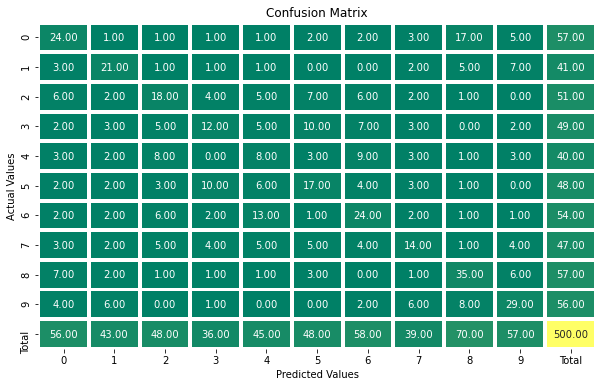

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.43      0.42      0.42        57
           1       0.49      0.51      0.50        41
           2       0.38      0.35      0.36        51
           3       0.33      0.24      0.28        49
           4       0.18      0.20      0.19        40
           5       0.35      0.35      0.35        48
           6       0.41      0.44      0.43        54
           7       0.36      0.30      0.33        47
           8       0.50      0.61      0.55        57
           9       0.51      0.52      0.51        56

    accuracy                           0.40       500
   macro avg       0.39      0.40      0.39       500
weighted avg       0.40      0.40      0.40       500


************************************Kappa Score************************************


Kappa Score = 0.3365452262425306


In [63]:
acc_6
metricsmodule.classification_metric(y_test,y_pred6,y_prob6[:,1],label=[0,1,2,3,4,5,6,7,8,9],n=50,verbose=True)

### Hyperparameter tuning for SVM

In [67]:
start= time.time()
params={'C':[0.1,0.001,1],'kernel':['linear', 'poly', 'rbf'],'gamma':['scale', 'auto']}
       
cv5 = GridSearchCV(SVC(),param_grid=params,cv=5)
cv5.fit(X_train,y_train)

end=time.time()

dur=end-start
dur

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

8375.08862733841

In [68]:
cv5.best_params_
cv5.best_score_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

0.42919999999999997

### Tuned model for SVM

In [69]:
mod_cv6= SVC(probability=True,C= 1, gamma= 'scale', kernel= 'rbf').fit(X_train,y_train)
y_pred_cv6= mod_cv6.predict(X_test)
y_prob_cv6= mod_cv6.predict_proba(X_test)
acc_cv6=accuracy_score(y_test,y_pred_cv6)

0.404

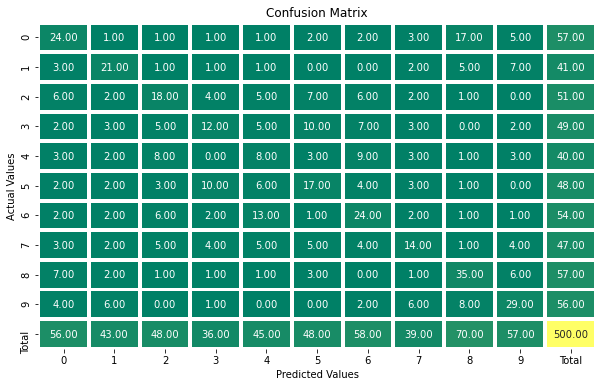

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.43      0.42      0.42        57
           1       0.49      0.51      0.50        41
           2       0.38      0.35      0.36        51
           3       0.33      0.24      0.28        49
           4       0.18      0.20      0.19        40
           5       0.35      0.35      0.35        48
           6       0.41      0.44      0.43        54
           7       0.36      0.30      0.33        47
           8       0.50      0.61      0.55        57
           9       0.51      0.52      0.51        56

    accuracy                           0.40       500
   macro avg       0.39      0.40      0.39       500
weighted avg       0.40      0.40      0.40       500


************************************Kappa Score************************************


Kappa Score = 0.3365452262425306


In [70]:
acc_cv6
metricsmodule.classification_metric(y_test,y_pred_cv6,y_prob_cv6[:,1],label=[0,1,2,3,4,5,6,7,8,9],n=50,verbose=True)

### 7. ADA Boost

- AdaBoost is an ensemble learning technique.

- Ensemble methods can decrease variance using bagging approach, bias using a boosting approach, or improve predictions using stacking approach.
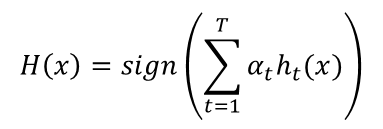

AdaBoost predicts the value by creating multiple weak learners, associating a weight to each data point based on the predictions of that point in each learner and finally giving the output.


- The idea is to set weights to both classifiers and data points (samples) in a way that forces classifiers to concentrate on observations that are difficult to correctly classify.
- This process is done sequentially in that the two weights are adjusted at each step as iterations of the algorithm proceed. -- This is why Adaboost is referred to as a sequential ensemble method — ensemble referring to a type of learning that combines several models to improve the final predictive performance.

- **Boosting:** combining many weak (simple) learners to create a highly accurate prediction.
- **Weak learners:** classifiers that produce prediction that is slightly better than random guessing. Random guessing is equivalent to 50%, like flipping a coin. This will be familiar to those who are conversant with information theory, particularly the idea of Shannon’s entropy.
- **Hypothesis:** our classifier, aka the function that our machine learning algorithm makes to approximate the unknown function, the target (true) function, which models the relationship between the input values x and output values y.
- **Adaboost:** The first practical boosting algorithm invented by Freund and Schapire (1995). It is based on Vapnik and Chervonekis’ idea that for a trained classifier to be effective and accurate in its predictions, it should meet these three conditions:
 1) classifier should be trained on “enough” training examples
 2) it should provide a good fit to these examples by producing low training error
 3) it should be simple (in that simpler models are better than overly complex one)
 
#### Layman's Explanation of Ada Boosting
 
One way to think of boosting (and Adaboost) is to consider the story of the Blind men and the elephant.

Each of the blind men had a partial description (a weak classifier) of the elephant and by combining these they were able to get the complete picture. In other words a strong classifier was created from an ensemble of weak classifiers.

Adaboost is an adaptive algorithm so in the context of the story, the following additional details could be added:
- There was an annual gathering of blind men. They were taken to see an elephant but since there were so many of them, this had to be done in batches (sequentially). 
- In all there were six batches. The first group of blind men were led to randomly selected spots near the elephant. Each of their (partial) descriptions was tested out to see how well it matched the full description of an elephant. The blind man who happened to be near the trunk gave the most accurate description and his was selected as the best description (first weak classifier) of the elephant.
- But since he described only the trunk, some of his description was incomplete.
- The incomplete sections were noted and when the second batch of blind men were led into the room, they were gently steered to these incomplete parts. 
- Of the second batch, one touched the tail and when he described the elephant as a rope, it matched the elephant better than the descriptions others gave and so this was selected as the second weak classifier. For each of the remaining four batches of blind men the best classifier was similarly obtained.
- In the end, the best descriptions from each of the six batches were combined (additively). But since the trunk and belly are larger than the tail, those descriptions were given more weight by the chair of the convention who had come up with this challenge. This final description —the combination— did in fact describe the elephant quite well.

Explanation:
Boosting is an ensemble technique that attempts to create a strong classifier from a number of weak classifiers.

This is done by building a model from training data, then creating a second model that attempts to correct the errors from the first model.

Models are added until the training set is prediced perfectly or a maximum number of models are added.

**Ada Boost is best used to boost the performance of the decision trees on binary classification problems.**

**Adaboost meets two conditions:**

1. The classifier should be trained interactively on various weighed training examples.
2. In each iteration, it tries to provide an excellent fit for these examples by minimizing training error.

### How does the AdaBoost algorithm work?

It works in the following steps:

1. Initially, Adaboost selects a training subset randomly.
2. It iteratively trains the AdaBoost machine learning model by selecting the training set based on the accurate prediction of the last training.
3. It assigns the higher weight to wrong classified observations so that in the next iteration these observations will get the high probability for classification.
4. Also, It assigns the weight to the trained classifier in each iteration according to the accuracy of the classifier. The more accurate classifier will get high weight.
5. This process iterate until the complete training data fits without any error or until reached to the specified maximum number of estimators.
6. To classify, perform a "vote" across all of the learning algorithms you built.
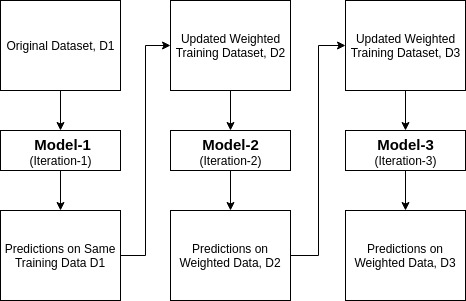

**How do we select the training set?** 

- Each weak classifier is trained using a random subset of overall training set.
- But wait there’s a catch here… random subset is not actually 100% random!
- After training a classifier at any level, ada-boost assigns weight to each training item. 
- Misclassified item is assigned higher weight so that it appears in the training subset of next classifier with higher probability.
- After each classifier is trained, the weight is assigned to the classifier as well based on accuracy. More accurate classifier is assigned higher weight so that it will have more impact in final outcome.


**How to assign weight to each classifier?**

- A classifier with 50% accuracy is given a weight of zero, and a classifier with less than 50% accuracy is given negative weight.

> Mathematics
Lets look at the mathematical formula and parameters.
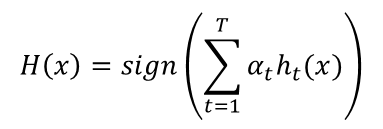
h_t(x) is the output of weak classifier t for input x
alpha_t is weight assigned to classifier.
alpha_t is calculated as follows:

alpha_t = 0.5 * ln( (1 — E)/E) : weight of classifier is straigt forward, it is based on the error rate E.

Initially, all the input training example has equal weightage.
A plot of alpha_t v/s error rate
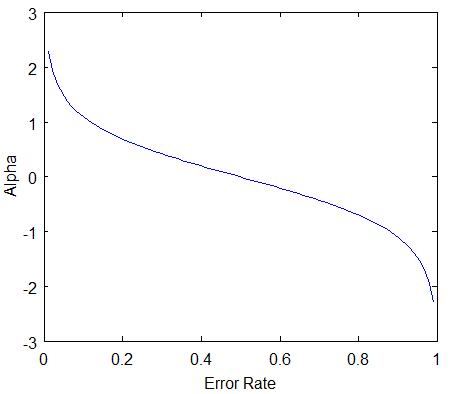
Source : http://mccormickml.com/2013/12/13/adaboost-tutorial/

Updating weight of training examples

After weak classifier is trained, we update the weight of each training example with following formula
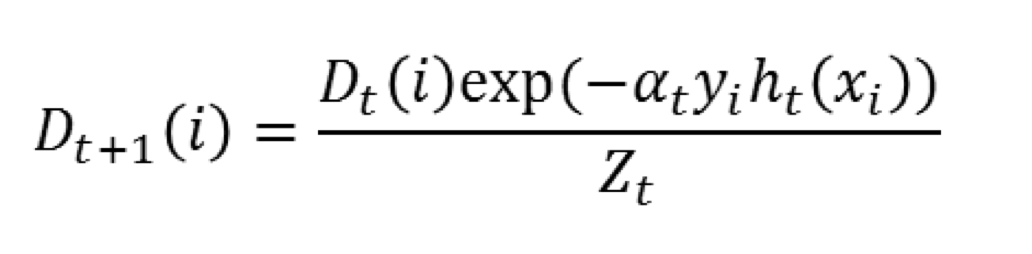

D_t is weight at previous level.

We normalize the weights by dividing each of them by the sum of all the weights, Z_t. For example, if all of the calculated weights added up to 15.7, then we would divide each of the weights by 15.7 so that they sum up to 1.0 instead.

y_i is y par of training example (x_i, y_i) y coordinate for simplicity.

### Pros and Cons of Ada Boosting
**Pros** 
AdaBoost is easy to implement. It iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners. 
- You can use many base classifiers with AdaBoost.
- AdaBoost is not prone to overfitting. This can be found out via experiment results, but there is no concrete reason available.

**Cons**
- AdaBoost is sensitive to noise data.
- It is highly affected by outliers because it tries to fit each point perfectly.
- AdaBoost is slower compared to XGBoost.


**Hyperparameters:**
"The most important parameters are base_estimator, n_estimators, and learning_rate." (Adaboost Classifier, Chris Albon)

- **base_estimator:** It is a weak learner used to train the model. It uses DecisionTreeClassifier as default weak learner for training purpose. You can also specify different machine learning algorithms.
- **n_estimators:** Number of weak learners to train iteratively.
- **learning_rate:** It contributes to the weights of weak learners. It uses 1 as a default value.

source:https://towardsdatascience.com/adaboost-for-dummies-breaking-down-the-math-and-its-equations-into-simple-terms-87f439757dcf
- https://www.datacamp.com/community/tutorials/adaboost-classifier-python
- https://medium.com/machine-learning-101/https-medium-com-savanpatel-chapter-6-adaboost-classifier-b945f330af06

### Time and Space Complexity in Ada Boost
- Train time complexity:O(n p n_trees)
- Test time complexity:O(p n_trees)
Here n denotes the data points in the dataset, p the number of features and n_trees suggest the number of estimators we are using in our model.



In [6]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [72]:
mod7 = AdaBoostClassifier().fit(X_train,y_train)
y_pred7 = mod7.predict(X_test)  
y_prob7 = mod7.predict_proba(X_test) 
acc7=accuracy_score(y_test,y_pred7)

0.294

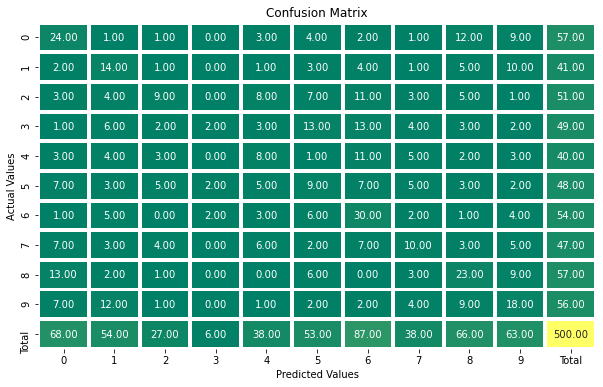

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.35      0.42      0.38        57
           1       0.26      0.34      0.29        41
           2       0.33      0.18      0.23        51
           3       0.33      0.04      0.07        49
           4       0.21      0.20      0.21        40
           5       0.17      0.19      0.18        48
           6       0.34      0.56      0.43        54
           7       0.26      0.21      0.24        47
           8       0.35      0.40      0.37        57
           9       0.29      0.32      0.30        56

    accuracy                           0.29       500
   macro avg       0.29      0.29      0.27       500
weighted avg       0.30      0.29      0.28       500


************************************Kappa Score************************************


Kappa Score = 0.21346161558994836


In [73]:
acc7
metricsmodule.classification_metric(y_test,y_pred7,y_prob7[:,1],label=[0,1,2,3,4,5,6,7,8,9],n=50,verbose=True)

### Hyperparameter Tuning for Ada Boost

In [85]:
start= time.time()
params={'n_estimators':[10,100],'learning_rate':[0.1,0.001,1]}
       
cv7 = GridSearchCV(AdaBoostClassifier(),param_grid=params,cv=4)
cv7.fit(X_train,y_train)

end=time.time()

dur=end-start
dur

GridSearchCV(cv=4, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.001, 1],
                         'n_estimators': [10, 100]})

2432.181913137436

In [86]:
cv7.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

### Tuned Model for Ada Boost

In [89]:
mod_cv7 = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 100).fit(X_train,y_train)
y_pred_cv7 = mod_cv7.predict(X_test)  
y_prob_cv7 = mod_cv7.predict_proba(X_test) 
acc_cv7=accuracy_score(y_test,y_pred_cv7)

0.316

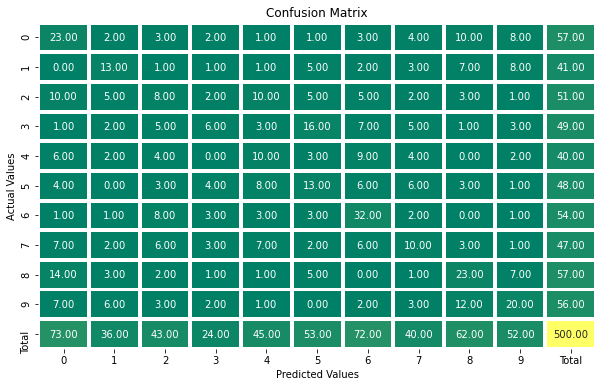

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.32      0.40      0.35        57
           1       0.36      0.32      0.34        41
           2       0.19      0.16      0.17        51
           3       0.25      0.12      0.16        49
           4       0.22      0.25      0.24        40
           5       0.25      0.27      0.26        48
           6       0.44      0.59      0.51        54
           7       0.25      0.21      0.23        47
           8       0.37      0.40      0.39        57
           9       0.38      0.36      0.37        56

    accuracy                           0.32       500
   macro avg       0.30      0.31      0.30       500
weighted avg       0.31      0.32      0.31       500


************************************Kappa Score************************************


Kappa Score = 0.23809014596588784


In [90]:
acc_cv7
metricsmodule.classification_metric(y_test,y_pred_cv7,y_prob_cv7[:,1],label=[0,1,2,3,4,5,6,7,8,9],n=50,verbose=True)

### 8. Gradient Boosting

> What is Gradient Boosting? \n
- The term gradient boosting consists of two sub-terms, gradient and boosting. We already know that gradient boosting is a boosting technique.Let us see how the term ‘gradient’ is related here.

Gradient boosting re-defines boosting as a numerical optimisation problem where the objective is to minimise the loss function of the model by adding weak learners using gradient descent. Gradient descent is a first-order iterative optimisation algorithm for finding a local minimum of a differentiable function. As gradient boosting is based on minimising a loss function, different types of loss functions can be used resulting in a flexible technique that can be applied to regression, multi-class classification, etc.

Intuitively, gradient boosting is a stage-wise additive model that generates learners during the learning process (i.e., trees are added one at a time, and existing trees in the model are not changed). The contribution of the weak learner to the ensemble is based on the gradient descent optimisation process. The calculated contribution of each tree is based on minimising the overall error of the strong learner.

Gradient boosting does not modify the sample distribution as weak learners train on the remaining residual errors of a strong learner (i.e, pseudo-residuals). By training on the residuals of the model, this is an alternative means to give more importance to misclassified observations. Intuitively, new weak learners are being added to concentrate on the areas where the existing learners are performing poorly. The contribution of each weak learner to the final prediction is based on a gradient optimisation process to minimise the overall error of the strong learner.


Difference betweenn Gradient Boosting and Ada Boosting

### Gradient Boosting                                                 
- This approach trains learners based upon minimising the loss function of a learner (i.e., training on the residuals of the model) 
- Weak learners are decision trees constructed in a greedy manner with split points based on purity scores (i.e., Gini, minimise loss). Thus, larger trees can be used with around 4 to 8 levels. Learners should still remain weak and so they should be constrained (i.e., the maximum number of layers, nodes, splits, leaf nodes)
- All the learners have equal weights in the case of gradient boosting. The weight is usually set as the learning rate which is small in magnitude.

### Adaptive Boosting
- This method focuses on training upon misclassified observations. Alters the distribution of the training dataset to increase weights on sample observations that are difficult to classify.
- The weak learners incase of adaptive boosting are a very basic form of decision tree known as stumps.
- The final prediction is based on a majority vote of the weak learners’ predictions weighted by their individual accuracy.


Classification using Gradient Boosting Trees
Suppose we want to predict whether a person has a Heart Disease based on Chest Pain, Good Blood Circulation and Blocked Arteries. Here is our sample dataset —

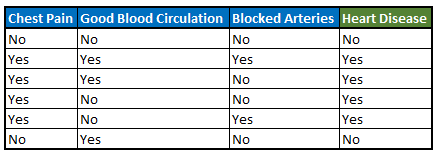

I. **Initial Prediction** — We start with a leaf which represents an initial prediction for every individual.
When we use the Gradient Boost for Classification, the initial Prediction for every individual is the log(odds).
For classification, this will be equal to log(odds) of the dependent variable. Since there are 4 people with and 2 without heart disease, log(odds) is equal to –

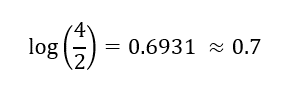

Next, we convert this to a probability using the Logistic Function –
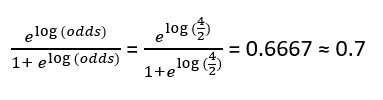

If we consider the probability threshold as 0.5, this means that our initial prediction is that all the individuals have Heart Disease, which is not the actual case.

II. **Calculate Residuals** — We will now calculate the residuals for each observation by using the following formula,

Residual = Actual value — Predicted value

where Actual value= 1 if the person has Heart Disease and 0 if not and Predicted value = 0.7

The final table after calculating the residuals is the following —
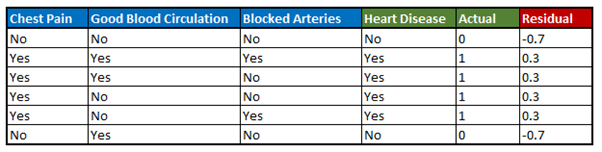

III. **Predict residuals** — Our next step involves building a Decision Tree to predict the residuals using Chest Pain, Good Blood Circulation and Blocked Arteries.

Here is a sample tree constructed —
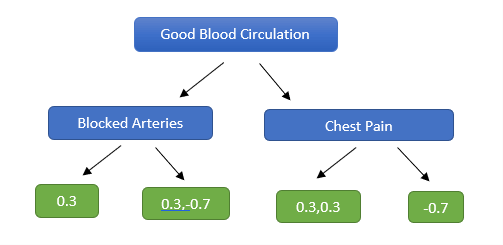

Since the number of residuals is more than the number of leaves, we can see that some residuals have ended up in the same leaf.

**How do we calculate the predicted residuals in each leaf?**
The initial prediction was in terms of log(odds) and the leaves are derived from a probability.

Hence, we need to do some transformation to get the predicted residuals in terms of log(odds). The most common transformation is done using the following formula —
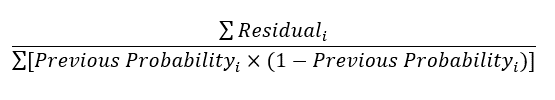

Applying this formula to the first leaf, we get predicted residual as –
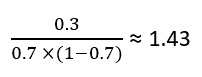

Similarly, the predicted residuals for the other leaves and the decision tree will finally look like —

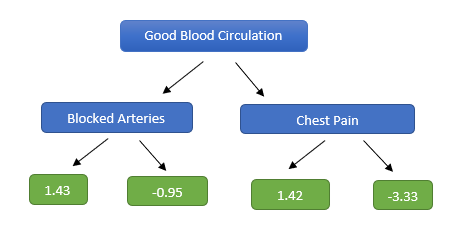

IV. **Obtain new probability of having a heart disease** — Now, let us pass each sample in our dataset through the nodes of the newly formed decision tree. The predicted residuals obtained for each observation will be added to the previous prediction to obtain whether the person has a heart disease or not.

In this context, we introduce a hyperparameter called the **_Learning Rate_**. The predicted residual will be multiplied by this learning rate and then added to the previous prediction.

**Why do we need this learning rate?**
It prevents overfitting.
Introducing the learning rate requires building more Decision Trees, hence, taking smaller steps towards the final solution. These small incremental steps help us achieve a comparable bias with a lower overall variance.

**Calculating the new probability –**
Let us consider the second observation in the dataset. Since, Good Blood Circulation = “Yes” followed by Blocked Arteries = “Yes” for the person, it ends up in the first leaf with a predicted residual of 1.43.

Assuming a learning rate of 0.2 , the new log(odds) prediction for this observation will be –

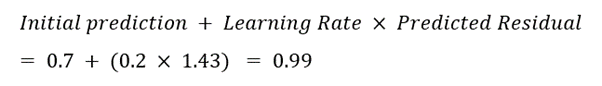

Similar computation is done for the rest of the observations.

V. __Obtain new residuals__ — After obtaining the predicted probabilities for all the observations, we will calculate the new residuals by subtracting these new predicted values from the actual values.

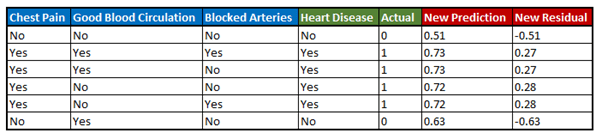


Now that we have the residuals, we will use these leaves for building the next decision tree as described in step III.

VI. Repeat steps III to V until the residuals converge to a value close to 0 or the number of iterations matches the value given as hyperparameter while running the algorithm.

VII. Final Computation — After we have calculated the output values for all the trees, the final log(odds) prediction that a person has a heart disease will be the following –
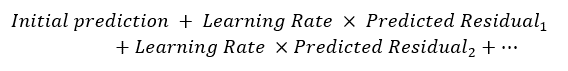

where subscript of predicted residual denotes the i-th tree where i = 1,2,3,…
Next, we need to convert this log(odds) prediction into a probability by plugging it into the logistic function.

Using the common probability threshold of 0.5 for making classification decisions, if the final predicted probability that the person has a heart disease > 0.5, then the answer will be “Yes”, else “No”.





https://www.affineanalytics.com/gradient-boosting-trees-for-classification-a-beginners-guide/

https://medium.com/analytics-vidhya/intuition-and-implementation-of-gradient-boost-part-2-f519af48ee2c

In [91]:
mod8 = GradientBoostingClassifier().fit(X_train,y_train)
y_pred8 = mod8.predict(X_test)  
y_prob8 = mod8.predict_proba(X_test) 
acc8=accuracy_score(y_test,y_pred8)

0.416

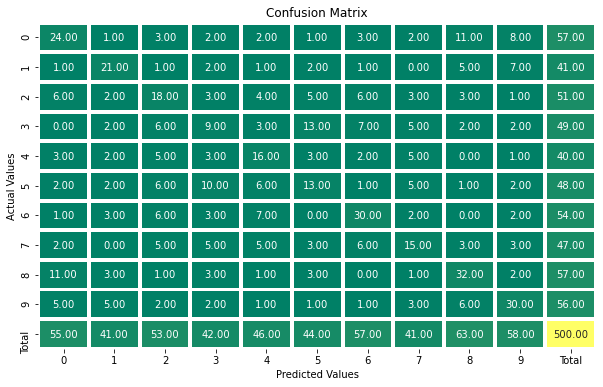

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.44      0.42      0.43        57
           1       0.51      0.51      0.51        41
           2       0.34      0.35      0.35        51
           3       0.21      0.18      0.20        49
           4       0.35      0.40      0.37        40
           5       0.30      0.27      0.28        48
           6       0.53      0.56      0.54        54
           7       0.37      0.32      0.34        47
           8       0.51      0.56      0.53        57
           9       0.52      0.54      0.53        56

    accuracy                           0.42       500
   macro avg       0.41      0.41      0.41       500
weighted avg       0.41      0.42      0.41       500


************************************Kappa Score************************************


Kappa Score = 0.3500336112755813


In [92]:
acc8
metricsmodule.classification_metric(y_test,y_pred8,y_prob8[:,1],label=[0,1,2,3,4,5,6,7,8,9],n=50,verbose=True)

### Hyperparameter Tuning for Gradient Boosting (Not able run , time complexity abd space complexity is very high)

In [5]:
import time
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

In [8]:
start= time.time()
params={'learning_rate':[0.1,0.001]}
       
cv8 = GridSearchCV(GradientBoostingClassifier(),param_grid=params,cv=5)
cv8.fit(X_train,y_train)

end=time.time()

dur=end-start
dur

KeyboardInterrupt: 

In [ ]:
cv8.best_params_
cv8.best_score_

### Tuned Model for Gradient Boosting

In [ ]:
mod_cv8 = GradientBoostingClassifier(.................).fit(X_train,y_train)
y_pred_cv8 = mod_cv8.predict(X_test)  
y_prob_cv8 = mod_cv8.predict_proba(X_test) 
acc_cv8=accuracy_score(y_test,y_pred_cv8)

In [ ]:
acc_cv8
metricsmodule.classification_metric(y_test,y_pred_cv8,y_prob_cv8[:,1],label=[0,1,2,3,4,5,6,7,8,9],n=50,verbose=True)

### 9. XGBoost

In [11]:
!pip install xgboost

In [18]:
import xgboost as xgb # pip install xgboost
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
import metricsmodule

In [15]:
mod9= XGBClassifier().fit(X_train,y_train)
y_pred9 = mod9.predict(X_test)  
y_prob9 = mod9.predict_proba(X_test) 


[10:36:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [16]:
acc9=accuracy_score(y_test,y_pred9)

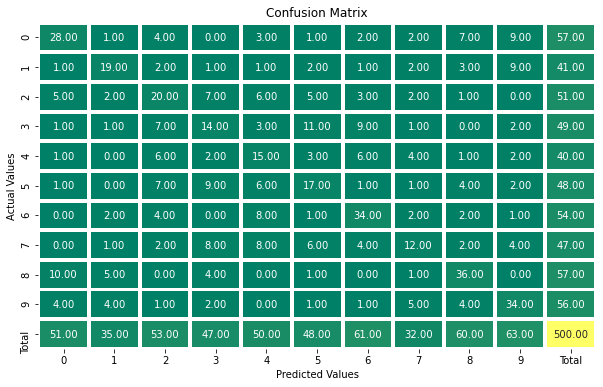

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.55      0.49      0.52        57
           1       0.54      0.46      0.50        41
           2       0.38      0.39      0.38        51
           3       0.30      0.29      0.29        49
           4       0.30      0.38      0.33        40
           5       0.35      0.35      0.35        48
           6       0.56      0.63      0.59        54
           7       0.38      0.26      0.30        47
           8       0.60      0.63      0.62        57
           9       0.54      0.61      0.57        56

    accuracy                           0.46       500
   macro avg       0.45      0.45      0.45       500
weighted avg       0.46      0.46      0.46       500


************************************Kappa Score************************************


Kappa Score = 0.39671062590716033


In [19]:
acc9
metricsmodule.classification_metric(y_test,y_pred9,y_prob9[:,1],label=[0,1,2,3,4,5,6,7,8,9],n=50,verbose=True)

### Hyperparameter tuning for XGBoost

In [ ]:
start= time.time()
params={'max_depth':[4,5,6],'min_child_weight':[4,5,6],'gamma':[i/10.0 for i in range(0,5)]}
       
cv9 = GridSearchCV(XGBClassifier(),param_grid=params,cv=5)
cv9.fit(X_train,y_train)

end=time.time()

dur=end-start
dur

In [ ]:
cv9.best_params_
cv9.best_score_

### Tuned Model for XGBoost

In [ ]:
mod_cv9 = XGBClassifier(.................).fit(X_train,y_train)
y_pred_cv9 = mod_cv9.predict(X_test)  
y_prob_cv9 = mod_cv9.predict_proba(X_test) 
acc_cv9=accuracy_score(y_test,y_pred_cv9)

In [ ]:
acc_cv9
metricsmodule.classification_metric(y_test,y_pred_cv9,y_prob_cv9[:,1],label=[0,1,2,3,4,5,6,7,8,9],n=50,verbose=True)

Conclude by following below mentioed steps -
1. Plot a table showing all the algorithms used and corresponding performance metrics
2. Is there any one algorithm that can be used on all the datasets? (Hint: Read about 'No Free Lunch' theorem)

In [20]:
mod_names=['LogisticRegression','GaussianNB','MultinomialNB','DecisionTreeClassifier''RandomForestClassifier','KNN','SVC','AdaBoostClassifier','GradientBoostClassifier','XGBoostingClassifier']   